TANG Kévin

# TP Noté 19/01/2023

UE Apprentissage et Analyse de données

Année 2022-2023 Semestre Automne

In [147]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pickle
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold

In [149]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [178]:
#Lecture du fichier
data = pd.read_csv('./Churn_Modelling.csv', sep=';')
labels = data.columns

In [151]:
#Affichage des donnees
data

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
2,3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
3,4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
4,5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6396,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0
6396,6397,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
6397,6398,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
6398,6399,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [152]:
#Taille des données
data.shape

(6400, 13)

In [153]:
#Transformation en array
data_array = data.to_numpy()

In [154]:
#Séparation des données
data_splited = np.hsplit(data_array, np.array([12]))
data_caracteres = data_splited[0]
data_exited = data_splited[1]
print("data_carateres shape : ", np.shape(data_caracteres))
print("data_colStatus shape : ", np.shape(data_exited))
print("moyenne positive : ", np.mean(data_exited))

data_carateres shape :  (6400, 12)
data_colStatus shape :  (6400, 1)
moyenne positive :  0.21890625


In [155]:
#Séparation des données selon la valeur de Exited
colExited = data_array[:,12]
array1 = data_array[colExited==1]
array0 = data_array[colExited==0] 

In [156]:
#Pourcentage de lignes ayant Exited==0
prct0 = (array0.shape[0] / data.shape[0]) * 100
print("Pourcentage d'exemples positifs :", prct0)

Pourcentage d'exemples positifs : 78.109375


In [157]:
#Pourcentage de lignes ayant Exited==1
prct1 = (array1.shape[0] / data.shape[0]) * 100
print("Pourcentage d'exemples négatifs :", prct1)

Pourcentage d'exemples négatifs : 21.890625


Number of 0 : 4999
Number of 1 : 1401


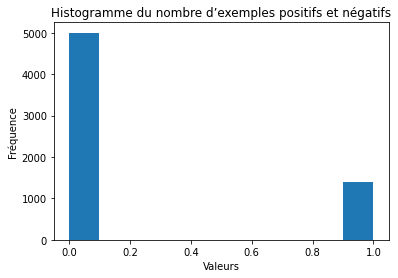

In [158]:
# Nombre d’exemples positifs et négatifs
countTarget = np.unique(data_exited, return_counts=True)

print("Number of", countTarget[0][0], ":", countTarget[1][0])
print("Number of", countTarget[0][1], ":", countTarget[1][1])

#Affichage de l'histogramme
plt.hist(data_exited)
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.title("Histogramme du nombre d’exemples positifs et négatifs")
plt.show()

In [159]:
#Séparation des colonnes numériques et catégorielles

#Données numériques
data_numbers = data_caracteres[:,[0,1,2,5,6,7,8,9,10,11]]

#Données categorielles
data_cat = data_caracteres[:,[3,4]]

In [160]:
#Encodage des donnees catagorielles
X_cat = OneHotEncoder().fit_transform(data_cat).toarray()

In [161]:
#Concaténation des donnees categorielles et numeriques
X = np.concatenate((X_cat, data_numbers),axis=1)

In [162]:
#Changement des types
X = X.astype(float)
data_exited = data_exited.astype(float)

In [163]:
x_train, x_test, y_train, y_test  = train_test_split(X, data_exited, random_state=1, test_size=0.5)

In [164]:
#Classifiers et fonction run
clfs = {
 'NBS': BernoulliNB(),
 'CART': DecisionTreeClassifier(criterion='gini'),
 'ID3': DecisionTreeClassifier(criterion='entropy'),
 'DSP': DecisionTreeClassifier(max_depth=1),
 'MLP20': MLPClassifier(hidden_layer_sizes=(20,10)),
 'MLP40': MLPClassifier(hidden_layer_sizes=(40,20)),
 'KNN5': KNeighborsClassifier(n_neighbors=5),
 'KNN10': KNeighborsClassifier(n_neighbors=10),
 'BAG100': BaggingClassifier(n_estimators=100),
 'BAG200': BaggingClassifier(n_estimators=200),
 'ADA100': AdaBoostClassifier(n_estimators=100),
 'ADA200': AdaBoostClassifier(n_estimators=200),
 'RF100': RandomForestClassifier(n_estimators=100),
 'RF200': RandomForestClassifier(n_estimators=200)
}

def run_classifiers(clfs, X, Y):
  kf = KFold(n_splits=10, shuffle=True, random_state=0)
  for i in clfs:
    clf = clfs[i]
    cv_acc = cross_validate(clf, X, Y, cv=kf, scoring=['accuracy'])
    print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc['test_accuracy']), np.std(cv_acc['test_accuracy'])))
    print("Fit time: ", np.mean(cv_acc['fit_time']))
    print("\n")

In [167]:
run_classifiers(clfs, x_train, y_test)

Accuracy for NBS is: 0.778 +/- 0.035
Fit time:  0.0025847673416137694


Accuracy for CART is: 0.637 +/- 0.031
Fit time:  0.036934614181518555


Accuracy for ID3 is: 0.645 +/- 0.034
Fit time:  0.047912883758544925


Accuracy for DSP is: 0.778 +/- 0.035
Fit time:  0.0032796621322631835


Accuracy for MLP20 is: 0.671 +/- 0.115
Fit time:  0.10755684375762939


Accuracy for MLP40 is: 0.637 +/- 0.213
Fit time:  0.12730669975280762


Accuracy for KNN5 is: 0.737 +/- 0.032
Fit time:  0.006210613250732422


Accuracy for KNN10 is: 0.770 +/- 0.033
Fit time:  0.005517935752868653


Accuracy for BAG100 is: 0.772 +/- 0.030
Fit time:  2.4802831172943116


Accuracy for BAG200 is: 0.774 +/- 0.032
Fit time:  4.480096602439881


Accuracy for ADA100 is: 0.771 +/- 0.037
Fit time:  0.4273449182510376


Accuracy for ADA200 is: 0.770 +/- 0.036
Fit time:  0.8551791191101075


Accuracy for RF100 is: 0.777 +/- 0.034
Fit time:  0.5449037075042724


Accuracy for RF200 is: 0.777 +/- 0.034
Fit time:  1.10378584861755

L'algorithme qui possède la meilleur accuracy et le meilleur temps de calcul pour notre jeu de données est BernoulliNB :

Accuracy = 0.778 +/- 0.035

Temps = 0.0025847673416137694 s

In [168]:
#Classifier
classif = BernoulliNB()
decision = classif.fit(x_train,y_train)
y_pred = decision.predict(x_test)

In [169]:
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Precision score : ", precision_score(y_test, y_pred))
print("Recall score : ", recall_score(y_test, y_pred))

Accuracy :  0.751875
Precision score :  0.39276485788113696
Recall score :  0.21378340365682139


In [170]:
#Normalisation des données
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [171]:
#Classifier
classif = BernoulliNB()
decision = classif.fit(x_train_scaled, y_train)
y_pred_norm = decision.predict(x_test_scaled)

In [172]:
print("Accuracy : ", accuracy_score(y_test, y_pred_norm))
print("Precision score : ", precision_score(y_test, y_pred_norm))
print("Recall score : ", recall_score(y_test, y_pred_norm))

Accuracy :  0.791875
Precision score :  0.5510204081632653
Recall score :  0.34177215189873417


In [173]:
#Application de l'ACP
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.fit_transform(x_test_scaled)

In [174]:
#Classifier
classif = BernoulliNB()
decision = classif.fit(x_train_pca, y_train)
y_pred_pca = decision.predict(x_test_pca)

In [175]:
print("Accuracy : ", accuracy_score(y_test, y_pred_pca))
print("Precision score : ", precision_score(y_test, y_pred_pca))
print("Recall score : ", recall_score(y_test, y_pred_pca))

Accuracy :  0.7421875
Precision score :  0.36428571428571427
Recall score :  0.21518987341772153


Ici, on cherche si un client d’une banque va partir à la concurrence ou non (Exited) pour surement prendre contact avec eux quitte à ce que ne soit pas le cas. 

L'algorithme ayant la meilleure accuracy est avec les données normalisées.

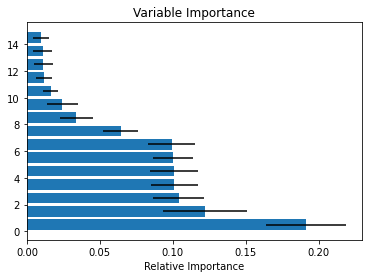

In [182]:
classif_rfc = RandomForestClassifier(n_estimators=100)
classif_rfc.fit(x_train_scaled, y_train)

importances = classif_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in classif_rfc.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
padding = np.arange(x_train_scaled.size/len(x_train_scaled)) + 0.5

plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [183]:
for f in range(x_train_scaled.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, sorted_idx[f], importances[sorted_idx[f]]))

1. Feature 8 (0.191177)
2. Feature 11 (0.121878)
3. Feature 10 (0.103934)
4. Feature 7 (0.101113)
5. Feature 14 (0.100627)
6. Feature 5 (0.100128)
7. Feature 6 (0.099213)
8. Feature 9 (0.064276)
9. Feature 13 (0.033962)
10. Feature 1 (0.024329)
11. Feature 12 (0.016284)
12. Feature 0 (0.011787)
13. Feature 4 (0.011279)
14. Feature 3 (0.010664)
15. Feature 2 (0.009349)


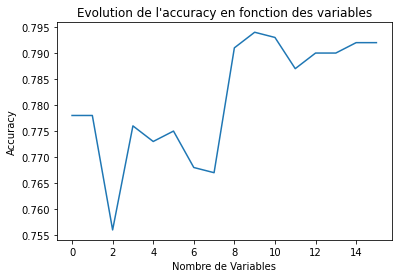

In [184]:
scores=np.zeros(x_train_scaled.shape[1]+1)

for f in np.arange(0, x_train_scaled.shape[1]+1):
 X1_f = x_train_scaled[:,sorted_idx[:f+1]]
 X2_f = x_test_scaled [:,sorted_idx[:f+1]]
 classif.fit(X1_f,y_train)
 Yclassif_mlp = classif.predict(X2_f)
 scores[f] = np.round(accuracy_score(y_test, Yclassif_mlp), 3)

plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

On trouve la meilleure accuracy avec 10 variables

In [185]:
selection = [8,11,10,7,14,5,6,9,13,1]
x_train = x_train[:, selection]
x_train_scaled = x_train_scaled[:, selection]
x_test = x_test[:, selection]

In [188]:
run_classifiers(clfs, x_train_scaled, y_test)

Accuracy for NBS is: 0.778 +/- 0.035
Fit time:  0.003547525405883789


Accuracy for CART is: 0.642 +/- 0.023
Fit time:  0.034618163108825685


Accuracy for ID3 is: 0.645 +/- 0.027
Fit time:  0.04538748264312744


Accuracy for DSP is: 0.778 +/- 0.035
Fit time:  0.0028020143508911133


Accuracy for MLP20 is: 0.769 +/- 0.033
Fit time:  1.6753924131393432


Accuracy for MLP40 is: 0.741 +/- 0.037
Fit time:  2.298676061630249


Accuracy for KNN5 is: 0.727 +/- 0.027
Fit time:  0.003988027572631836


Accuracy for KNN10 is: 0.771 +/- 0.034
Fit time:  0.0038941144943237306


Accuracy for BAG100 is: 0.776 +/- 0.035
Fit time:  1.9688332796096801


Accuracy for BAG200 is: 0.773 +/- 0.033
Fit time:  4.538020133972168


Accuracy for ADA100 is: 0.771 +/- 0.035
Fit time:  0.5904708623886108


Accuracy for ADA200 is: 0.768 +/- 0.036
Fit time:  0.8083307981491089


Accuracy for RF100 is: 0.776 +/- 0.033
Fit time:  0.7235278844833374


Accuracy for RF200 is: 0.776 +/- 0.034
Fit time:  1.5804352521896363



In [189]:
#Lecture du fichier
data_scoring = pd.read_csv('./Churn_Modelling_scoring.csv', sep=';')
labels_scoring = data.columns

In [190]:
#Affichage des données
data_scoring

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,6401,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
1,6402,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80
2,6403,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
3,6404,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73
4,6405,15737173,497,Spain,Male,24,3,0.00,2,1,0,76390.01
...,...,...,...,...,...,...,...,...,...,...,...,...
3595,9996,15581736,673,Germany,Male,47,1,183579.54,2,0,1,34047.54
3596,9997,15588839,606,Spain,Male,30,8,180307.73,2,1,1,1914.41
3597,9998,15605622,841,Spain,Male,28,4,0.00,2,1,1,179436.60
3598,9999,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71


In [191]:
#Transformation en array
data_scoring_array = data_scoring.to_numpy()

In [193]:
#Séparation des colonnes numériques et catégorielles

#Données numériques
data_scoring_numbers = data_scoring_array[:,[0,1,2,5,6,7,8,9,10,11]]

#Données categorielles
data_scoring_cat = data_scoring_array[:,[3,4]]

In [195]:
#Encodage des donnees catagorielles
X_scoring_cat = OneHotEncoder().fit_transform(data_scoring_cat).toarray()

In [197]:
#Concaténation des donnees categorielles et numeriques
X_scoring = np.concatenate((X_scoring_cat, data_scoring_numbers),axis=1)

In [198]:
#Changement de type
X_scoring = X_scoring.astype(float)

In [200]:
X_train, X_test = train_test_split(X_scoring, test_size=0.5, random_state=1)

In [202]:
selection = [8,11,10,7,14,5,6,9,13,1]
X_train = X_train[:, selection]
X_test = X_test[:, selection]

In [203]:
#Classifier
classif = BernoulliNB()
decision = classif.fit(x_train_scaled, y_train)
Y_pred = decision.predict(X_test)

In [214]:
for i in range(0, Y_pred.shape[0]):
  if(Y_pred[i] == 1):
    print(i)

235
713
1046
1102
